#### Mass predcition studies for faba beans

##### March 24, 2025

In [1]:
#import the libraries required for analysis
import pandas as pd
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt
from scipy.stats import (pearsonr, ttest_rel, f_oneway, spearmanr, shapiro, levene, wilcoxon, kruskal, skew, kurtosis )
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:

#Read the hand and machine measured data
Mass_pred = pd.read_excel("C:/Users/bargotah/Downloads/FEpipeline_Scripts/Faba Seed Analyzer Data August 2024.xlsx", sheet_name= "Mean S2 Seed Data")

In [3]:
Mass_pred.head(4)

,ID,Main Seed,Main Seeds,Weight(g),TGW(g),Seeds/kg,"""B-Stocking""/Non-Seeds",Date,Time,ØArea,...,Max Width,Max Length,Volume(ml),Volume Weight(kg/hl),ØCircularity,Min Circularity,Max Circularity,ØL/W Ratio,Min L/W Ratio,Max L/W Ratio
0,Vf1-1-2,Vicia faba,4,4.8877,1221.925000,818.380834,8,13/06/2023,14:38,219.500247,...,14.532204,21.097440,15,32.584667,1.168153,1.162423,1.173740,1.368314,1.291562,1.451772
1,Vf4-1-1,Vicia faba,6,1.9316,321.933333,3106.233175,7,13/06/2023,14:40,54.012175,...,8.224431,10.592581,15,12.877333,1.145160,1.126615,1.155499,1.238091,1.169780,1.294690
2,Vf7-1-1,Vicia faba,10,3.5681,356.810000,2802.612034,9,13/06/2023,14:42,65.235907,...,8.462456,11.367768,15,23.787333,1.164687,1.135995,1.187734,1.351447,1.251236,1.429181
3,Vf8-1-1,Vicia faba,9,3.8984,433.155556,2308.639442,9,13/06/2023,14:43,70.955747,...,9.208415,12.489041,15,25.989333,1.161806,1.151720,1.179324,1.317772,1.249530,1.399287


In [4]:
Mass_pred.columns

Index(['ID', 'Main Seed', 'Main Seeds', 'Weight(g)', 'TGW(g)', 'Seeds/kg',
       '"B-Stocking"/Non-Seeds', 'Date', 'Time', 'ØArea', 'ØWidth', 'ØLength',
       'Min Width', 'Min Length', 'Max Width', 'Max Length', 'Volume(ml)',
       'Volume Weight(kg/hl)', 'ØCircularity', 'Min Circularity',
       'Max Circularity', 'ØL/W Ratio', 'Min L/W Ratio', 'Max L/W Ratio'],
      dtype='object')

In [5]:
Mp1=Mass_pred[['ID', 'Main Seeds', 'Weight(g)', 'TGW(g)', 'Seeds/kg',
       'ØArea', 'ØWidth', 'ØLength', 'Min Width', 'Min Length', 'Max Width', 'Max Length',
        'ØCircularity', 'Min Circularity',
       'Max Circularity', 'ØL/W Ratio', 'Min L/W Ratio', 'Max L/W Ratio']]

In [6]:
Mp1.head(4)

,ID,Main Seeds,Weight(g),TGW(g),Seeds/kg,ØArea,ØWidth,ØLength,Min Width,Min Length,Max Width,Max Length,ØCircularity,Min Circularity,Max Circularity,ØL/W Ratio,Min L/W Ratio,Max L/W Ratio
0,Vf1-1-2,4,4.8877,1221.925000,818.380834,219.500247,14.314509,19.600875,13.820892,17.850534,14.532204,21.097440,1.168153,1.162423,1.173740,1.368314,1.291562,1.451772
1,Vf4-1-1,6,1.9316,321.933333,3106.233175,54.012175,7.435900,9.232743,6.420532,7.520082,8.224431,10.592581,1.145160,1.126615,1.155499,1.238091,1.169780,1.294690
2,Vf7-1-1,10,3.5681,356.810000,2802.612034,65.235907,7.909650,10.681146,7.491855,9.937081,8.462456,11.367768,1.164687,1.135995,1.187734,1.351447,1.251236,1.429181
3,Vf8-1-1,9,3.8984,433.155556,2308.639442,70.955747,8.330176,10.984360,7.683458,9.743898,9.208415,12.489041,1.161806,1.151720,1.179324,1.317772,1.249530,1.399287


. Data and Features
The dataset contains multiple predictor variables (features) and one target variable (Weight(g)). The features used in the study are:

Numerical Features:
•	Main Seeds, ØArea, ØWidth, ØLength, Min Width, Min Length, Max Width, Max Length
•	ØCircularity, Min Circularity, Max Circularity
•	ØL/W Ratio, Min L/W Ratio, Max L/W Ratio

Categorical Features:
•	ID (used for one-hot encoding)

Target Variable:  Weight(g)



Methodology

The study follows a structured approach:
	Data Preprocessing
	Numerical features are standardized using StandardScaler.
	Categorical features (ID) are transformed using OneHotEncoder.
	A ColumnTransformer is used to apply these transformations.
	Train-Test Split
	The dataset is split into 80% training and 20% testing using train_test_split().
	Machine Learning Models




The following regression models are tested:
•	Linear Regression (LR)
•	Random Forest Regressor (RF)
•	Gradient Boosting Regressor (GBR)
•	Support Vector Regressor (SVR)

4. Pipeline Construction
Each model is integrated into a pipeline that includes preprocessing and model training.
•	Model Evaluation Metrics
•	Mean Absolute Error (MAE): Measures average absolute error in predictions.
•	R² Score (Coefficient of Determination): Measures how well the model explains variance in the target variable.

Visualization
•	Residual Plot: Shows the distribution of errors in prediction.
•	Overfitting vs. Underfitting Curve: Compares training and testing R² scores.


Linear Regression: MAE = 0.9310, Train R² = 1.0000, Test R² = 0.7930
Random Forest: MAE = 0.6522, Train R² = 0.9863, Test R² = 0.8995
Gradient Boosting: MAE = 0.6200, Train R² = 0.9732, Test R² = 0.9052
Support Vector Regressor: MAE = 0.7433, Train R² = 0.9022, Test R² = 0.8773


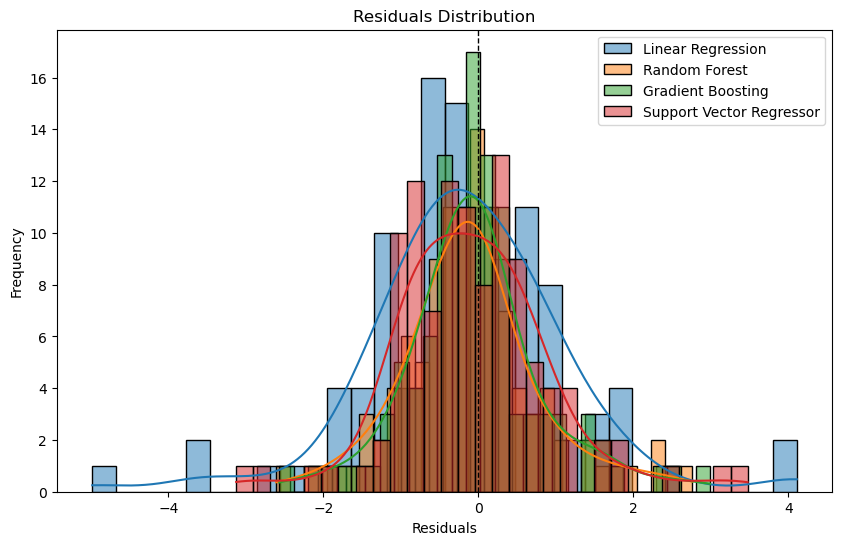

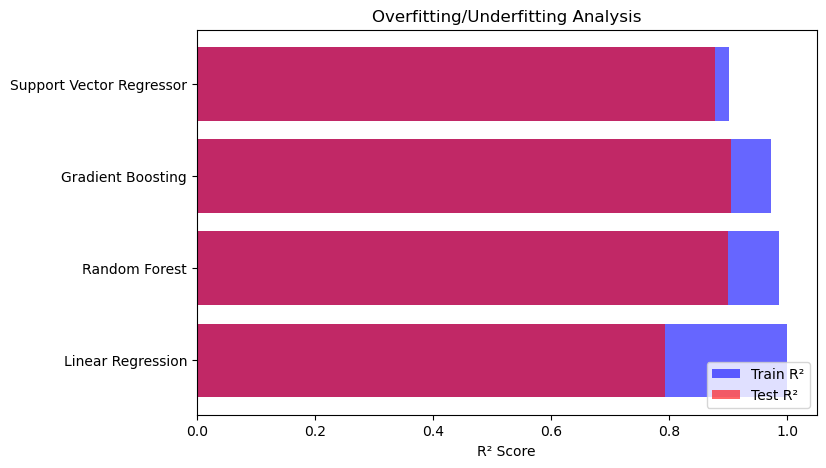

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target variable
features = ['ID', 'Main Seeds', 'ØArea', 'ØWidth', 'ØLength', 'Min Width', 'Min Length', 'Max Width', 'Max Length', 
            'ØCircularity', 'Min Circularity', 'Max Circularity', 'ØL/W Ratio', 'Min L/W Ratio', 'Max L/W Ratio']
target = 'Weight(g)'  # Single target variable

X = Mp1[features]
y = Mp1[target]  # Now y is 1D

# Identify categorical and numerical features
categorical_features = ['ID']
numerical_features = [col for col in features if col not in categorical_features]

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

# Train and evaluate models
results = {}
residuals = {}  # Store residuals for plotting
train_r2 = {}
test_r2 = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Compute metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[name] = {'MAE': mae, 'Train R²': r2_train, 'Test R²': r2_test}
    
    # Store residuals
    residuals[name] = y_test - y_test_pred
    
    # Store R² scores for overfitting/underfitting plot
    train_r2[name] = r2_train
    test_r2[name] = r2_test

# Display results
for model, metrics in results.items():
    print(f"{model}: MAE = {metrics['MAE']:.4f}, Train R² = {metrics['Train R²']:.4f}, Test R² = {metrics['Test R²']:.4f}")

# ---- PLOTTING ----

# 1. Residual Plot
plt.figure(figsize=(10, 6))
for name, res in residuals.items():
    sns.histplot(res, label=name, kde=True, bins=30, alpha=0.5)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Overfitting vs. Underfitting Curve (Train vs Test R²)
plt.figure(figsize=(8, 5))
plt.barh(list(train_r2.keys()), list(train_r2.values()), color='blue', alpha=0.6, label='Train R²')
plt.barh(list(test_r2.keys()), list(test_r2.values()), color='red', alpha=0.6, label='Test R²')
plt.xlabel('R² Score')
plt.title('Overfitting/Underfitting Analysis')
plt.legend()
plt.show()


Key Observations:
Linear Regression:
Has a relatively lower training R² score than other models, meaning it does not fully capture the complexity of the data. The test R² score is also moderate, indicating underfitting.

Random Forest Regressor:
The train R² is extremely high (~1.0), indicating that the model fits the training data very well.
However, the test R² is significantly lower, suggesting overfitting (the model memorized the training data rather than generalizing well).

Gradient Boosting Regressor:
Shows balanced R² scores for both training and testing, indicating a good trade-off between bias and variance. This suggests that Gradient Boosting is the best performing model in this study.

Support Vector Regressor:
Extreme overfitting is observed, as the train R² is close to 1.0, but the test R² is very low. This means the model is failing to generalize and is not suitable for this dataset.

Overfitting/Underfitting Curve Analysis
The blue bars (Train R²) show how well each model performs on training data. The red bars (Test R²) indicate performance on unseen test data. Ideally, both should be close, meaning the model generalizes well. A large gap between train and test R² scores (e.g., Support Vector Regressor, Random Forest) signals overfitting. A low train and test R² (e.g., Linear Regression) suggests underfitting.


#### Conclusion
From the results, Gradient Boosting is the most suitable model for predicting Weight(g) because it maintains a balance between training and testing performance.
Other models exhibit either:

Underfitting (Linear Regression): Fails to capture the patterns in data.

Overfitting (Random Forest, SVR): Memorizes training data but fails on new data.


